In [2]:
import pandas as pd
from statistics import mean 
from numpy import std 
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

colors = sns.color_palette("Set2", 4)
sns.set_style("ticks")
sns.despine()

<Figure size 640x480 with 0 Axes>

## Read data

In [3]:
result_folder = "../output/classification_model/"
pdf_folder = "pdf"
csv_folder = "csv"
tex_folder = "tex"

In [4]:
avg_std_metric_df = pd.read_csv(result_folder + csv_folder + "/avg_std_metric_all_scenarios_without_sc5.csv")
all_values_df = pd.read_csv(result_folder + csv_folder + "/all_values_metric_all_scenarios_without_sc5.csv")
avg_std_metric_sc5_df = pd.read_csv(result_folder + csv_folder + "/avg_std_metric_sc5.csv")
all_values_sc5_df = pd.read_csv(result_folder + csv_folder + "/all_values_sc5_metric.csv")
accuracy_df = pd.read_csv(result_folder + csv_folder + "/accuracy_all_scenarios_without_sc5.csv")
accuracy_sc5_df = pd.read_csv(result_folder + csv_folder + "/accuracy_sc5.csv")


In [8]:
avg_std_metric_df[avg_std_metric_df["Scenario"] == "Sc. 1"]

,Scenario,Class,Metric,avg,std
12,Sc. 1,glioma,precision,0.92,0.081
13,Sc. 1,meningioma,precision,0.78,0.046
14,Sc. 1,notumor,precision,0.99,0.005
15,Sc. 1,pituitary,precision,0.93,0.057
16,Sc. 1,glioma,recall,0.87,0.082
17,Sc. 1,meningioma,recall,0.85,0.113
18,Sc. 1,notumor,recall,0.99,0.000
19,Sc. 1,pituitary,recall,0.95,0.036
20,Sc. 1,glioma,f1-score,0.89,0.016
21,Sc. 1,meningioma,f1-score,0.81,0.045


In [7]:
avg_std_metric_df[(avg_std_metric_df["Scenario"] == "Sc. 2 (+11%)") | (avg_std_metric_df["Scenario"] == "Sc. 2 (+25%)") | (avg_std_metric_df["Scenario"] == "Sc. 2 (+50%)")]

,Scenario,Class,Metric,avg,std
24,Sc. 2 (+11%),glioma,precision,0.94,0.034
25,Sc. 2 (+11%),meningioma,precision,0.81,0.087
26,Sc. 2 (+11%),notumor,precision,0.98,0.005
27,Sc. 2 (+11%),pituitary,precision,0.97,0.014
28,Sc. 2 (+11%),glioma,recall,0.88,0.076
29,Sc. 2 (+11%),meningioma,recall,0.85,0.077
30,Sc. 2 (+11%),notumor,recall,0.99,0.008
31,Sc. 2 (+11%),pituitary,recall,0.96,0.021
32,Sc. 2 (+11%),glioma,f1-score,0.90,0.031
33,Sc. 2 (+11%),meningioma,f1-score,0.82,0.029


In [5]:
def get_conc2_for_error_bars(amount_comparisons, amount_classes):
    res = []
    for i in range(0, amount_comparisons):
        for ele in range(amount_classes):
            res.append(i)
    return res

# Plot precision and recall per class and Scenario

### Scenario 2, 3 and 4

In [6]:
def get_precision_recall_avg_bar_plot_from_all(df, scenario, lower_ylim, xtick_labels, amount_comparisons=4, amount_classes=4):
    metrics_list = ["precision", "recall"]
    for metric in metrics_list:
        ax = sns.barplot(x="Scenario", y="Measurement", data=df[df["Metric"] == metric], hue="Class", palette=colors)
        ax.set(xlabel=None, ylabel=metric, ylim=[lower_ylim, 1.02])
        plt.legend(bbox_to_anchor=(.5, 1.08), loc='upper center', borderaxespad=0, ncol=4)
        if xtick_labels != None:
            ax.set_xticklabels(xtick_labels)
        plt.tight_layout()
        plt.savefig(result_folder + pdf_folder + "/" + metric + "_scenario" + scenario + ".pdf")
        plt.show()

In [7]:
def get_precision_recall_avg_box_plot(df, scenario, lower_ylim, xtick_labels):
    metrics_list = ["precision", "recall"]
    for metric in metrics_list:
        ax = sns.catplot(x="Scenario", y="Measurement", data=df[df["Metric"] == metric], hue="Class", palette=colors, kind="box", edgecolor=".6")
        ax.set(xlabel=None, ylabel=metric, ylim=[lower_ylim, 1.02])
        #plt.legend(bbox_to_anchor=(.5, 1.08), loc='upper center', borderaxespad=0, ncol=4, fancybox=True)
        #plt.tight_layout()
        if xtick_labels != None:
            ax.set_xticklabels(xtick_labels)
        sns.move_legend(ax, "upper center", bbox_to_anchor=(.5, 1.08), title=None, ncol=4)
        plt.savefig(result_folder + pdf_folder + "/relplot_" + metric + "_scenario" + scenario + ".pdf")
        plt.show()

In [8]:
scenario_ticks_dict = {
    "2" : ["Initial", "+11%", "+25%", "+50%"],
    "3" : ["Initial", "+11%", "+25%", "+50%"],
    "4" : ["Initial", "+200 img", "+400 img", "+600 img"]
}

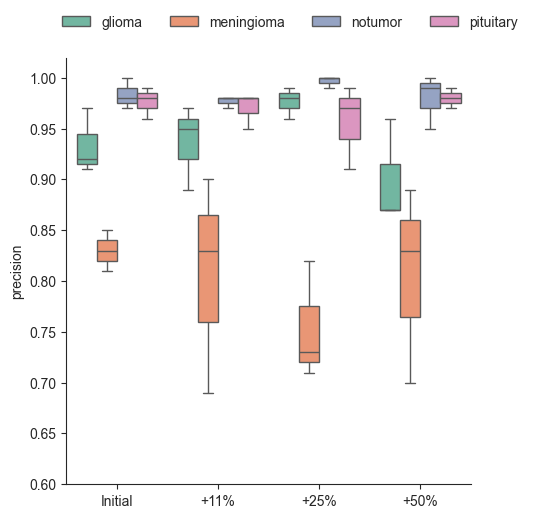

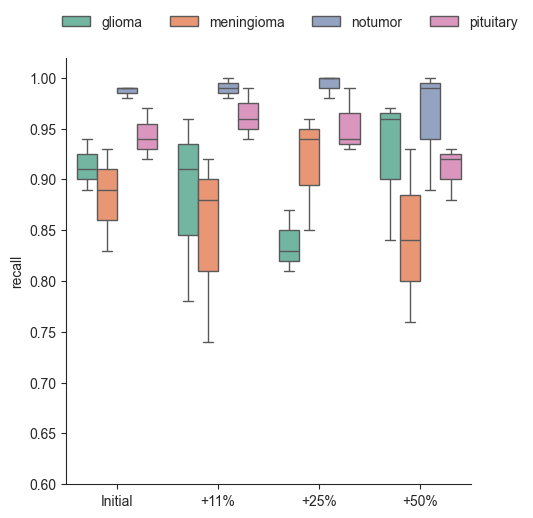

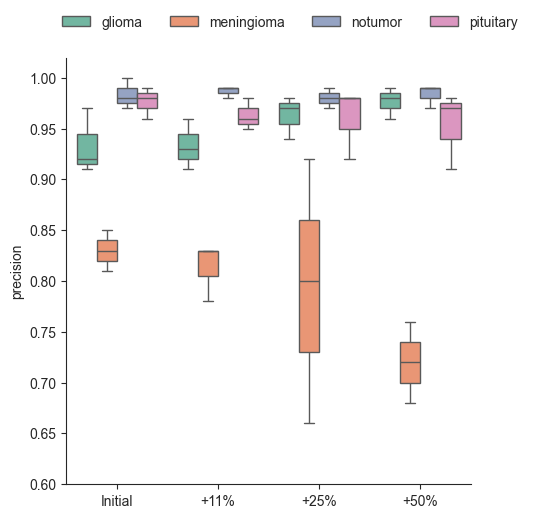

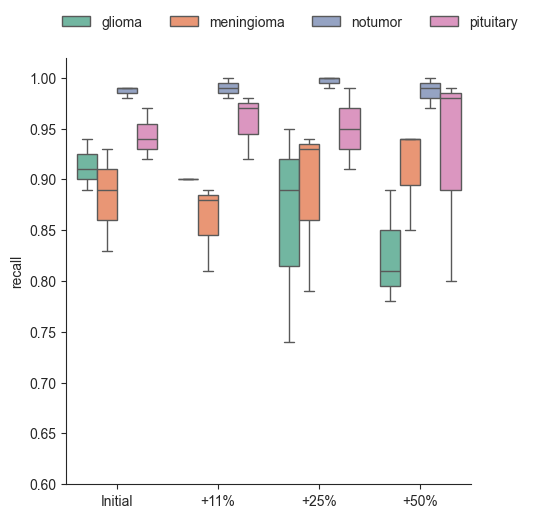

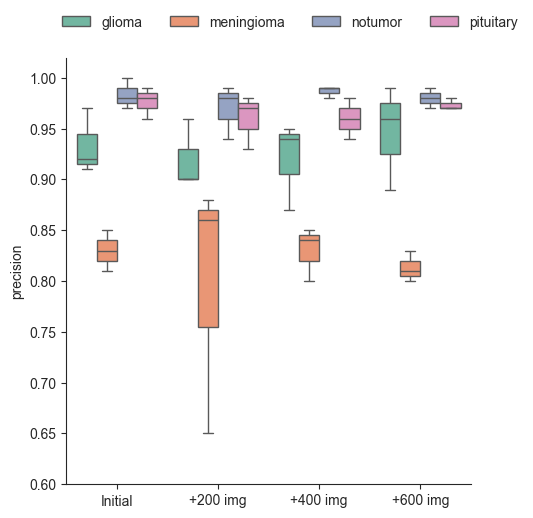

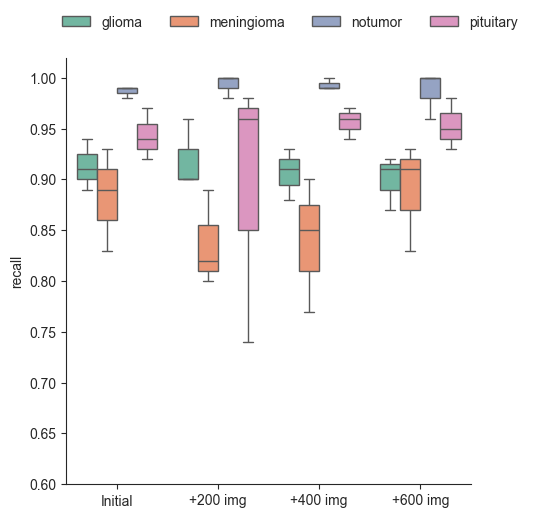

In [9]:
for scenario in scenario_ticks_dict:
    df = all_values_df[(all_values_df["Scenario"] == scenario_ticks_dict[scenario][0]) | (all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][1] + ")") | (all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][2] + ")") | ((all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][3] + ")"))]
    get_precision_recall_avg_box_plot(df, scenario, 0.6, scenario_ticks_dict[scenario])

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


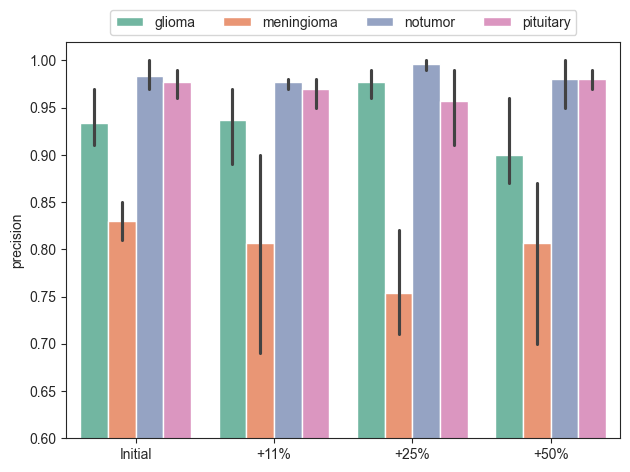

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


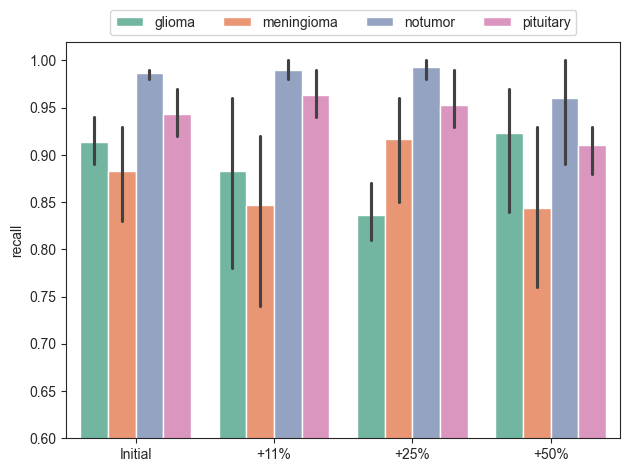

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


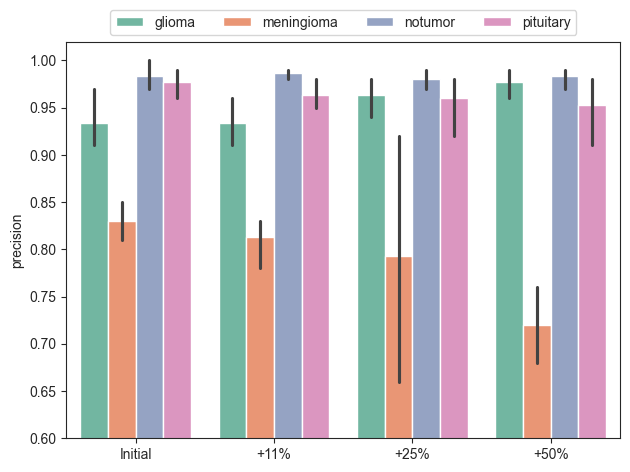

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


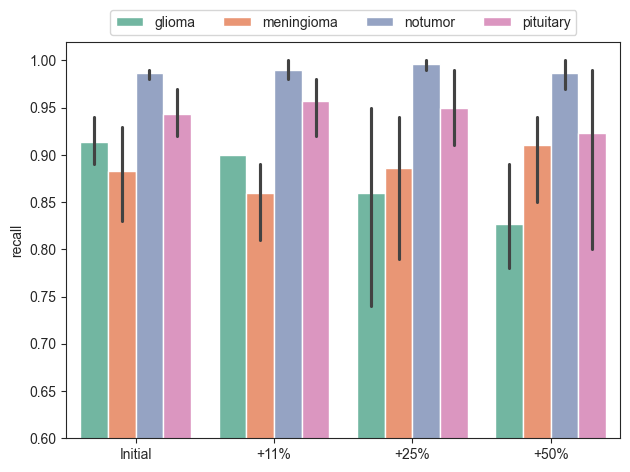

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


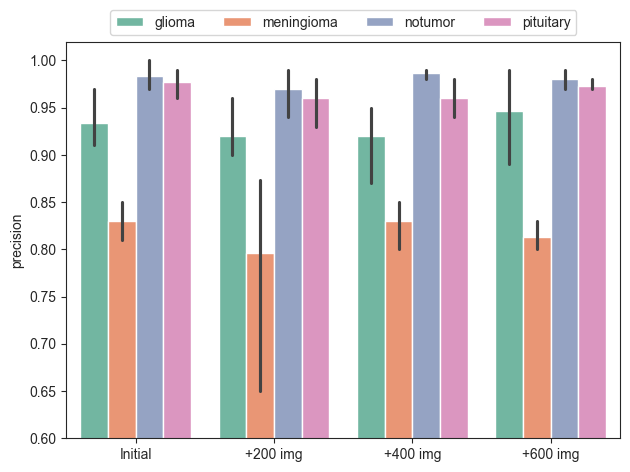

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/2815429922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels)


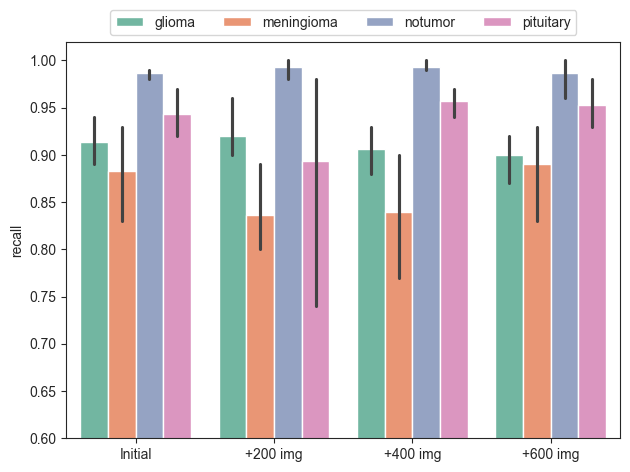

In [53]:
for scenario in scenario_ticks_dict:
    df = all_values_df[(all_values_df["Scenario"] == scenario_ticks_dict[scenario][0]) | (all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][1] + ")") | (all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][2] + ")") | ((all_values_df["Scenario"] == "Sc. " + scenario + " (" + scenario_ticks_dict[scenario][3] + ")"))]
    get_precision_recall_avg_bar_plot_from_all(df, scenario, 0.6, scenario_ticks_dict[scenario])

### Scenario 1, 6 in one plot

#### boxplot

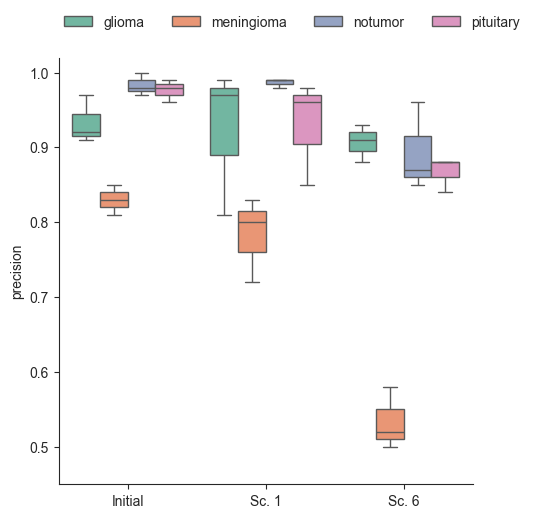

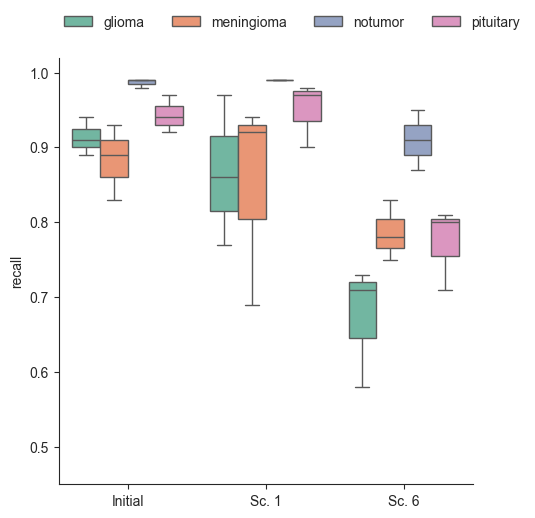

In [11]:
df = all_values_df[(all_values_df["Scenario"] == "Initial") | (all_values_df["Scenario"] == "Sc. 1") | (all_values_df["Scenario"] == "Sc. 6")]
get_precision_recall_avg_box_plot(df, "1.6", 0.45, None)

##### bar plot

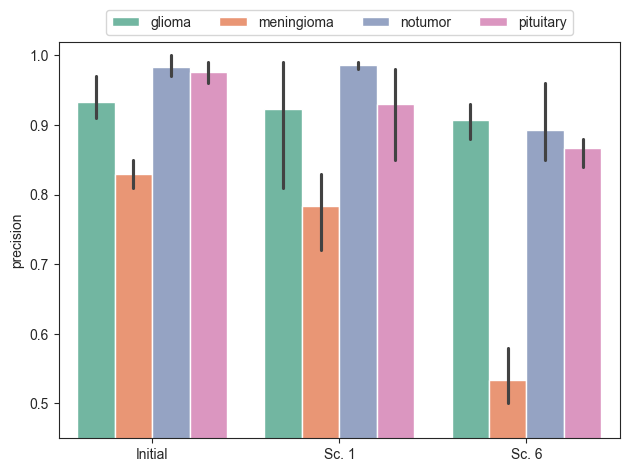

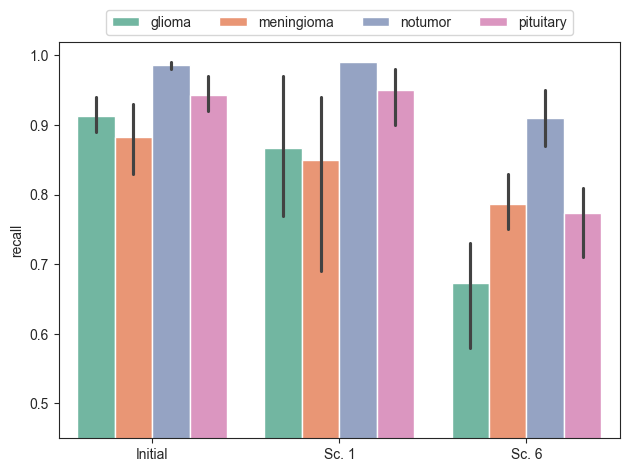

In [52]:
df = all_values_df[(all_values_df["Scenario"] == "Initial") | (all_values_df["Scenario"] == "Sc. 1") | (all_values_df["Scenario"] == "Sc. 6")]
get_precision_recall_avg_bar_plot_from_all(df, "1.6", 0.45, None, amount_comparisons=3)

#### Scenario 5

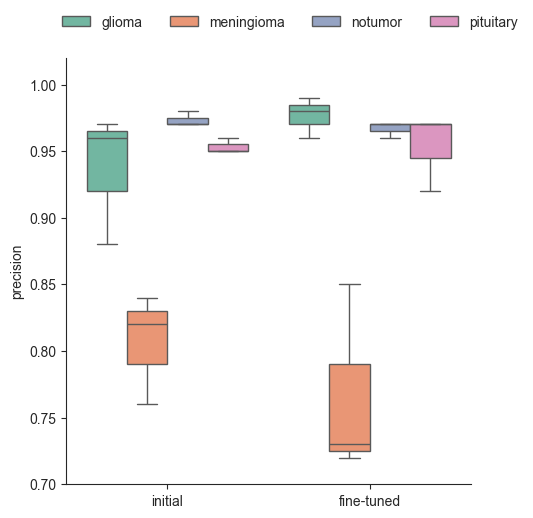

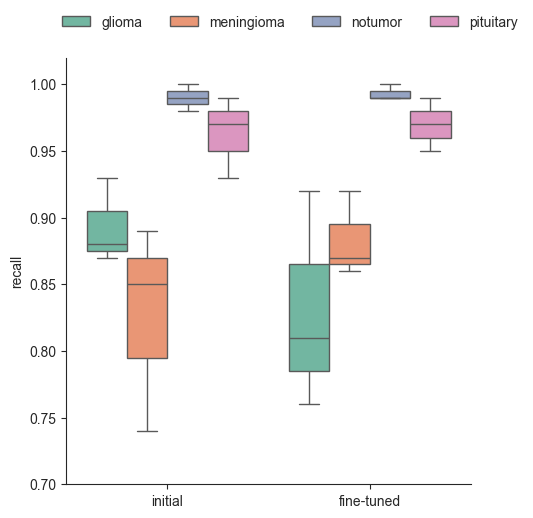

In [13]:
get_precision_recall_avg_box_plot(all_values_sc5_df, "5", 0.7, None)

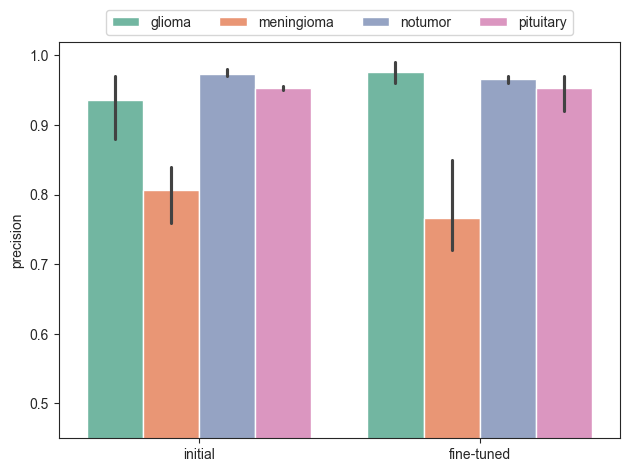

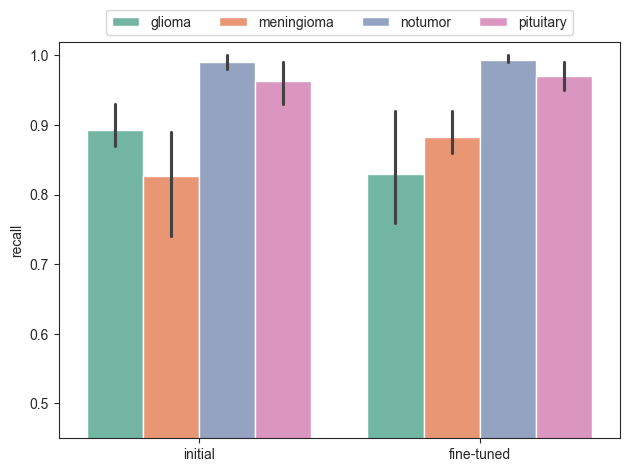

In [51]:
get_precision_recall_avg_bar_plot_from_all(all_values_sc5_df, "5", 0.45, None, amount_comparisons=2)

## Average f1-score over all Scenarios

In [15]:
def get_avg_line_plot_for_all_scenarios(df, metric, scenario, without_sc6=True, small=False):
    df = df[df["Metric"] == metric]
    if small:
        #ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="Class", palette=colors, marker="p")
        ax = sns.barplot(data=df, x='Scenario', y='Measurement', hue="Class", palette=colors)
    else:
        ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="Class", palette=colors, marker="p")
        fig = plt.gcf()
        fig.autofmt_xdate()
    ax.legend(bbox_to_anchor=(.5, 1.1), loc='upper center', borderaxespad=0, ncol=4, fancybox=True)
    ax.set(xlabel=None, ylabel=metric, ylim=(0.65, 1))
    without_title = "without_sc6" if without_sc6 else "with_sc6"
    plt.savefig(result_folder + pdf_folder + "/avg_" + metric + "_" + scenario + "_" + without_title + ".pdf")
    plt.show()

#### Without scenario 6

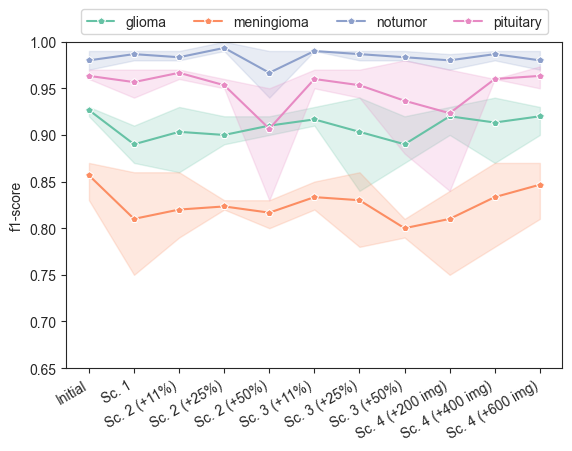

In [16]:
metric = "f1-score"
df = all_values_df[~(all_values_df["Scenario"] == "Sc. 5") & ~(all_values_df["Scenario"] == "Sc. 6")]
get_avg_line_plot_for_all_scenarios(df, metric, "all_scenarios")

#### With scenario 6

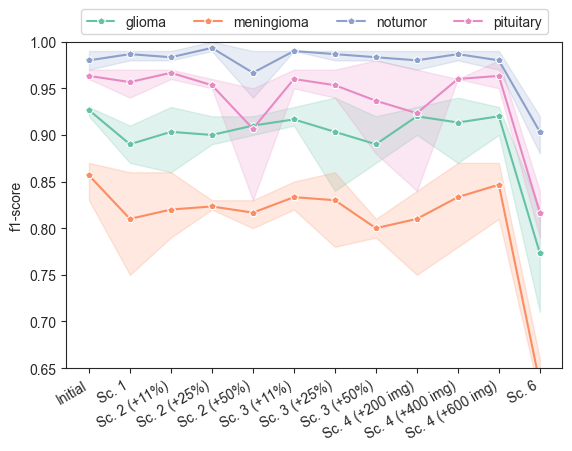

In [17]:
metric = "f1-score"
df = all_values_df[~(all_values_df["Scenario"] == "Sc. 5")]
get_avg_line_plot_for_all_scenarios(df, metric, "all_scenarios", without_sc6=False)

### Only Sc. 5

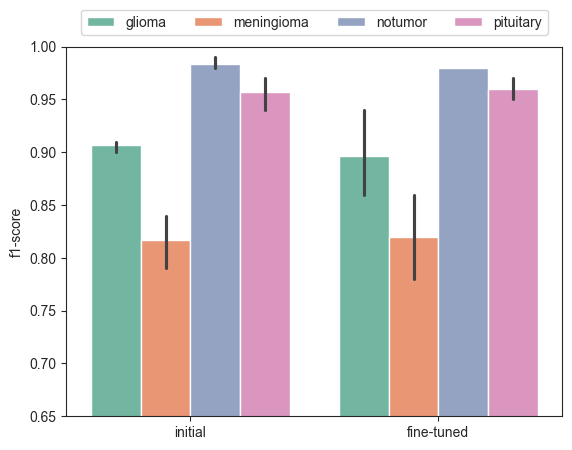

In [18]:
metric = "f1-score"
get_avg_line_plot_for_all_scenarios(all_values_sc5_df, metric, "sc5", without_sc6=False, small=True)

## Accuracy

In [19]:
def get_avg_line_plot_for_all_scenarios_accuracy(df, metric, scenario, lower_ylim, without_sc6=True, small=False):
    if small:
        #ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="Class", palette=colors, marker="p")
        ax = sns.catplot(data=df, x='Scenario', y='Measurement', hue="sc5", palette=colors, marker="p", kind="point", legend=False)
    else:
        ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="sc5", palette=colors, marker="p", legend=False)
        fig = plt.gcf()
        fig.autofmt_xdate()
    #ax.legend(bbox_to_anchor=(.5, 1.1), loc='upper center', borderaxespad=0, ncol=4, fancybox=True)
    ax.set(xlabel=None, ylabel=metric, ylim=(lower_ylim, 1))
    without_title = "without_sc6" if without_sc6 else "with_sc6"
    plt.savefig(result_folder + pdf_folder + "/avg_" + metric + "_" + scenario + "_" + without_title + ".pdf")
    plt.show()

In [20]:
metric = "accuracy"
lower_ylim = 0.75

In [21]:
accuracy_df["sc5"] = "no"

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/3486655405.py:6: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="sc5", palette=colors, marker="p", legend=False)


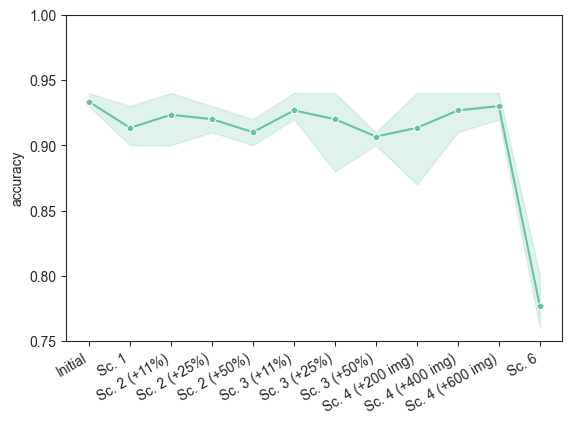

In [22]:
get_avg_line_plot_for_all_scenarios_accuracy(accuracy_df, metric, "all_scenarios", lower_ylim, without_sc6=False)

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/3486655405.py:6: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  ax = sns.lineplot(data=df, x='Scenario', y='Measurement', hue="sc5", palette=colors, marker="p", legend=False)


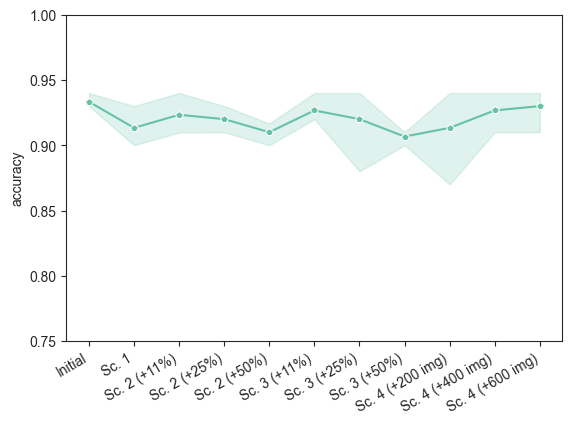

In [23]:
get_avg_line_plot_for_all_scenarios_accuracy(accuracy_df[~(accuracy_df["Scenario"] == "Sc. 6")], metric, "all_scenarios", lower_ylim, without_sc6=True)

### Only Sc. 5

In [24]:
accuracy_sc5_df["sc5"] = "yes"

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/3486655405.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  ax = sns.catplot(data=df, x='Scenario', y='Measurement', hue="sc5", palette=colors, marker="p", kind="point", legend=False)


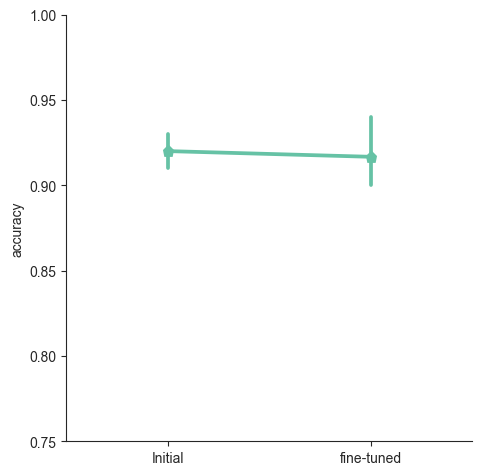

In [25]:
get_avg_line_plot_for_all_scenarios_accuracy(accuracy_sc5_df, metric, "sc5", lower_ylim, small=True)

In [54]:
avg_accuracy_df = pd.DataFrame(columns=list(accuracy_df["Scenario"].unique()), index=["avg", "std"])
for scenario in avg_accuracy_df.columns:
    avg_accuracy_df.loc["avg", scenario] = round(mean(accuracy_df[accuracy_df["Scenario"] == scenario]["Measurement"]), 2)
    avg_accuracy_df.loc["std", scenario] = round(std(accuracy_df[accuracy_df["Scenario"] == scenario]["Measurement"]), 2)
avg_accuracy_df.T.to_latex(result_folder + tex_folder + "/accuracy_avg_std.tex", float_format="{:0.2f}".format, escape=True, caption="Accuracy over all Scenarios (except Scenario 5).", label="tab:allAccurracy")
avg_accuracy_df

,Initial,Sc. 1,Sc. 2 (+11%),Sc. 2 (+25%),Sc. 2 (+50%),Sc. 3 (+11%),Sc. 3 (+25%),Sc. 3 (+50%),Sc. 4 (+200 img),Sc. 4 (+400 img),Sc. 4 (+600 img),Sc. 6
avg,0.93,0.91,0.92,0.92,0.91,0.93,0.92,0.91,0.91,0.93,0.93,0.78
std,0.0,0.01,0.02,0.01,0.01,0.01,0.03,0.0,0.03,0.01,0.01,0.02


### Scenario 5 initial vs fine-tuned (precision&recall)

In [99]:
wide_sc5_df = pd.DataFrame(columns=pd.MultiIndex.from_product([list(avg_std_metric_sc5_df["Scenario"].unique()), ["precision", "recall"]]), index=list(avg_std_metric_sc5_df["Class"].unique()))

for column in wide_sc5_df.columns:
    scenario = column[0]
    metric = column[1]
    for class_name in wide_sc5_df.index:
        wide_sc5_df.loc[class_name, column] = float(avg_std_metric_sc5_df[(avg_std_metric_sc5_df["Scenario"] == scenario) & (avg_std_metric_sc5_df["Metric"] == metric) & (avg_std_metric_sc5_df["Class"] == class_name)]["avg"])
wide_sc5_df.to_latex(result_folder + tex_folder + "/sc5_all_metrics.tex", float_format="{:0.2f}".format, escape=True, caption="Class-wise Precision \& Recall in Scenario 5.", label="tab:sc5precRecall")
wide_sc5_df

/var/folders/qv/tqh1ls9x7nlgts1pcbvs42140000gn/T/ipykernel_93008/3929931676.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  wide_sc5_df.loc[class_name, column] = float(avg_std_metric_sc5_df[(avg_std_metric_sc5_df["Scenario"] == scenario) & (avg_std_metric_sc5_df["Metric"] == metric) & (avg_std_metric_sc5_df["Class"] == class_name)]["avg"])


initial        fine-tuned       
           precision recall  precision recall
glioma          0.94   0.89       0.98   0.83
meningioma      0.81   0.83       0.77   0.88
notumor         0.97   0.99       0.97   0.99
pituitary       0.95   0.96       0.95   0.97